In [1]:
library(statnet)

Loading required package: tergm

Loading required package: ergm

Loading required package: network

network: Classes for Relational Data
Version 1.16.1 created on 2020-10-06.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.



ergm: version 3.11.0, created on 2020-10-14
Copyright (c) 2020, Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Carter T. Butts, University of California -- Irvine
                    Steven M. Goodreau, University of Washington
                    Pavel N. Krivitsky, UNSW Sydney
                    M

               Installed ReposVer Built  
EpiModel       "2.0.3"   "2.1.0"  "4.0.5"
ergm           "3.11.0"  "4.0.1"  "4.0.5"
ergm.count     "3.4.0"   "4.0.2"  "4.0.5"
ergm.ego       "0.6.1"   "1.0.0"  "4.0.5"
ergm.rank      "1.2.0"   "4.0.0"  "4.0.5"
network        "1.16.1"  "1.17.1" "4.0.5"
networkDynamic "0.10.1"  "0.11.0" "4.0.5"
statnet.common "4.4.1"   "4.5.0"  "4.0.5"
tergm          "3.7.0"   "4.0.1"  "4.0.5"


Restart R and use "statnet::update_statnet()" to get the updates.



In [2]:
el = read.csv("../data/edgelist_2011.csv")

In [3]:
nl = read.csv("../data/nodelist_2011.csv")

In [4]:
nl$gdp_us_dollar <- log(nl$gdp_us_dollar)

In [5]:
net = network(el, directed = TRUE, matrix.type = 'edgelist', vertex.attr=nl, vertex.attrnames=colnames(nl), ignore.eval = FALSE, names.eval='trade')

In [6]:
set.edge.value(net, "trade", el$weight)

In [7]:
net

 Network attributes:
  vertices = 200 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 4077 
    missing edges= 0 
    non-missing edges= 4077 

 Vertex attribute names: 
    colonizer country_iso3 gdp_growth gdp_us_dollar inflation_rate vertex.names 

 Edge attribute names not shown 

In [8]:
model = ergm(net ~ edges + mutual + nodeocov("gdp_us_dollar") + absdiff("gdp_us_dollar") + nodeocov("inflation_rate") + absdiff("inflation_rate") + nodeocov("gdp_growth") + absdiff("gdp_growth") + nodematch("colonizer"))

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 0.477137395905592.

The log-likelihood improved by 2.603.

Iteration 2 of at most 20:

Optimizing with step length 0.71898488624908.

The log-likelihood improved by 2.347.

Iteration 3 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.2591.

Step length converged once. Increasing MCMC sample size.

Iteration 4 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.08954.

Step length converged twice. Stopping.

Finished MCMLE.

Evaluating log-likelihood at the estimate. 
Using 20 bridges: 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
.

This model was fit using MCMC.  To examine model diagnostics and check
for degeneracy, use the mcmc.diagno

In [9]:
summary(model)

Call:
ergm(formula = net ~ edges + mutual + nodeocov("gdp_us_dollar") + 
    absdiff("gdp_us_dollar") + nodeocov("inflation_rate") + absdiff("inflation_rate") + 
    nodeocov("gdp_growth") + absdiff("gdp_growth") + nodematch("colonizer"))

Iterations:  4 out of 20 

Monte Carlo MLE Results:
                          Estimate Std. Error MCMC % z value Pr(>|z|)    
edges                   -7.0391004  0.1796149      0 -39.190  < 1e-04 ***
mutual                   0.4736024  0.0701675      0   6.750  < 1e-04 ***
nodeocov.gdp_us_dollar   0.1843702  0.0070047      0  26.321  < 1e-04 ***
absdiff.gdp_us_dollar    0.0841678  0.0080326      0  10.478  < 1e-04 ***
nodeocov.inflation_rate  0.0011579  0.0035854      0   0.323  0.74673    
absdiff.inflation_rate  -0.0009095  0.0032208      0  -0.282  0.77765    
nodeocov.gdp_growth      0.0090740  0.0036444      0   2.490  0.01278 *  
absdiff.gdp_growth      -0.0058570  0.0028123      0  -2.083  0.03728 *  
nodematch.colonizer      0.1039298  0.0340

In [10]:
gof <- gof(model ~ model + distance + dspartners + odegree + idegree + triadcensus)

In [11]:
gof


Goodness-of-fit for model statistics 

                              obs      min      mean       max MC p-value
edges                     4076.00  3971.00   4087.42   4205.00       0.70
mutual                     304.00   262.00    304.49    350.00       1.00
nodeocov.gdp_us_dollar  102199.02 99524.41 102466.55 105412.10       0.80
absdiff.gdp_us_dollar    13229.01 12853.87  13242.47  13683.50       0.86
nodeocov.inflation_rate  24420.57 23240.13  24457.21  25893.33       0.94
absdiff.inflation_rate   20102.78 19075.96  20131.66  21442.40       1.00
nodeocov.gdp_growth      16011.89 15364.23  16018.63  16707.31       0.94
absdiff.gdp_growth       18806.16 17665.44  18839.59  19813.35       0.92
nodematch.colonizer       1600.00  1528.00   1603.41   1694.00       1.00

Goodness-of-fit for minimum geodesic distance 

      obs   min     mean   max MC p-value
1    4076  3971  4087.42  4205        0.7
2   19526 29202 29969.16 30611        0.0
3    6760  5019  5742.46  6565        0.0
4  

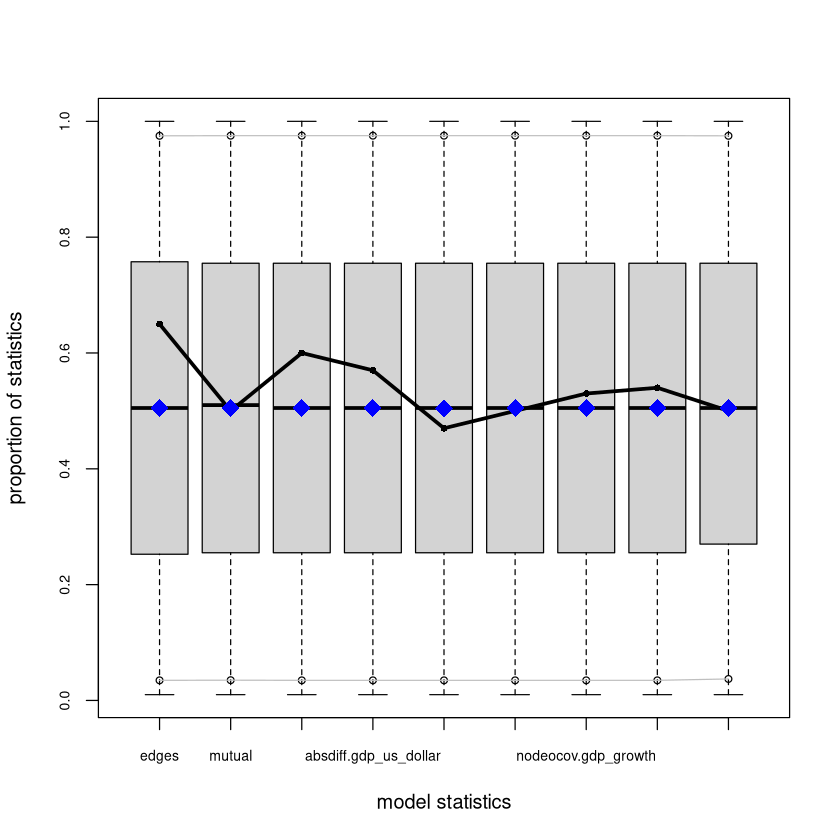

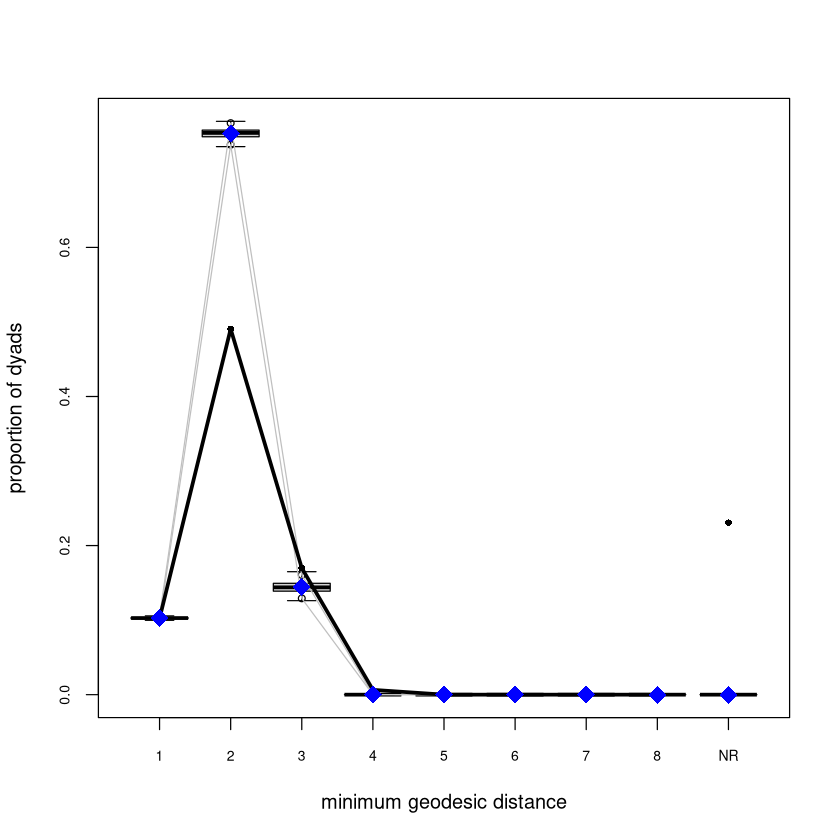

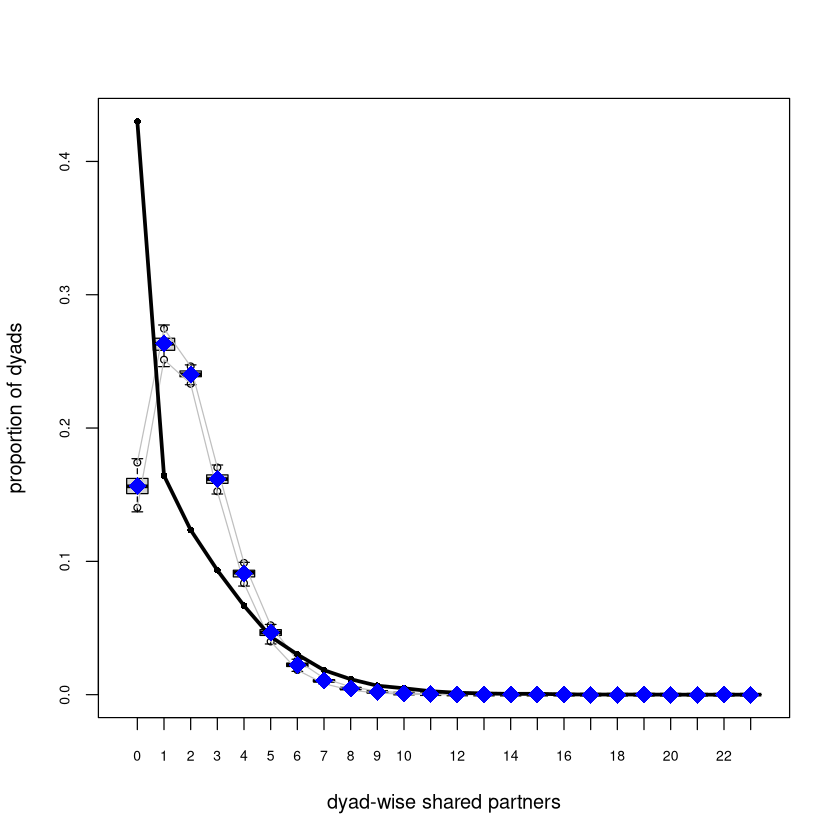

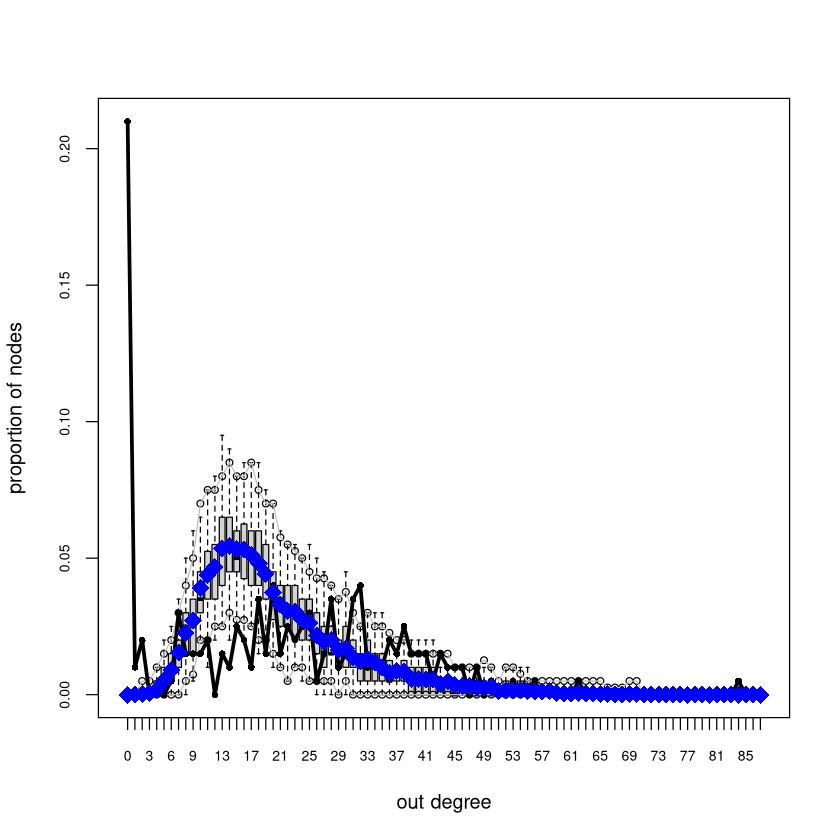

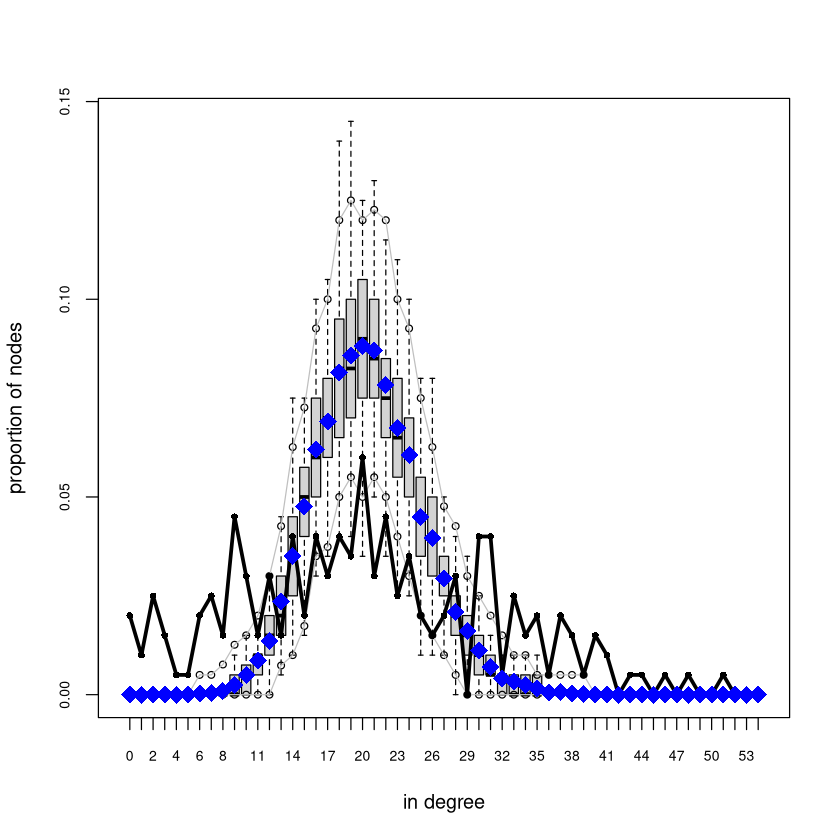

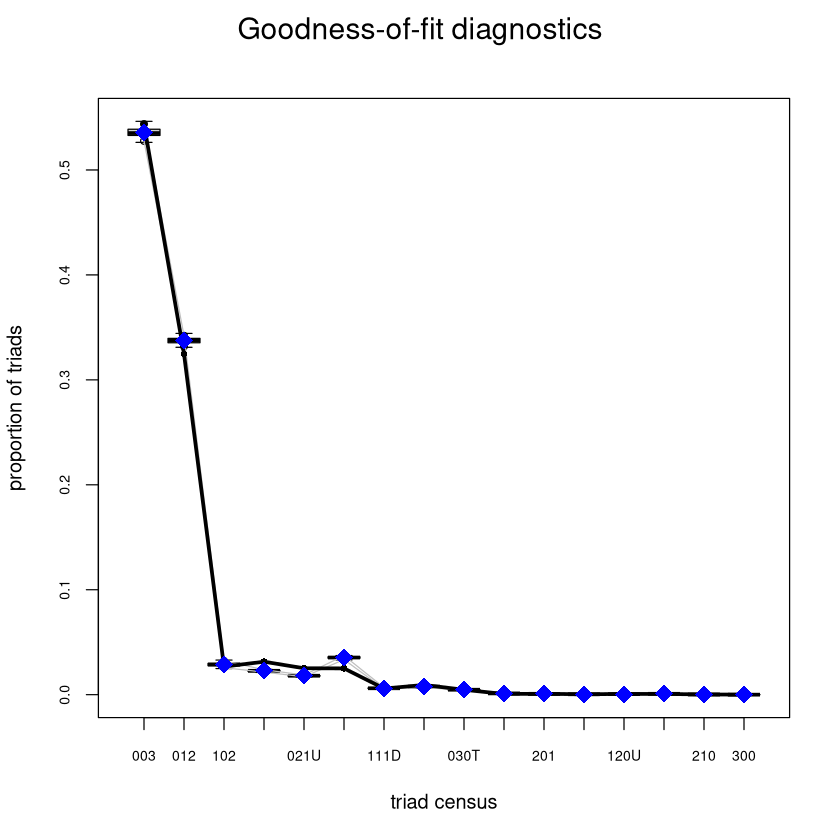

In [12]:
plot(gof)

Sample statistics summary:

Iterations = 16384:4209664
Thinning interval = 1024 
Number of chains = 1 
Sample size per chain = 4096 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                            Mean      SD Naive SE Time-series SE
edges                     -7.904   60.77   0.9495         4.2021
mutual                    -1.245   16.83   0.2630         0.9517
nodeocov.gdp_us_dollar  -193.954 1521.11  23.7673       108.0875
absdiff.gdp_us_dollar    -11.337  231.44   3.6163        17.0615
nodeocov.inflation_rate    1.004  496.23   7.7537        32.3043
absdiff.inflation_rate   -69.061  483.71   7.5580        30.7334
nodeocov.gdp_growth      -21.679  367.35   5.7398        22.7485
absdiff.gdp_growth       -67.127  462.19   7.2216        30.6387
nodematch.colonizer        5.457   38.39   0.5998         2.7503

2. Quantiles for each variable:

                           2.5%     25%     50%    75%  97.5%
edges                  

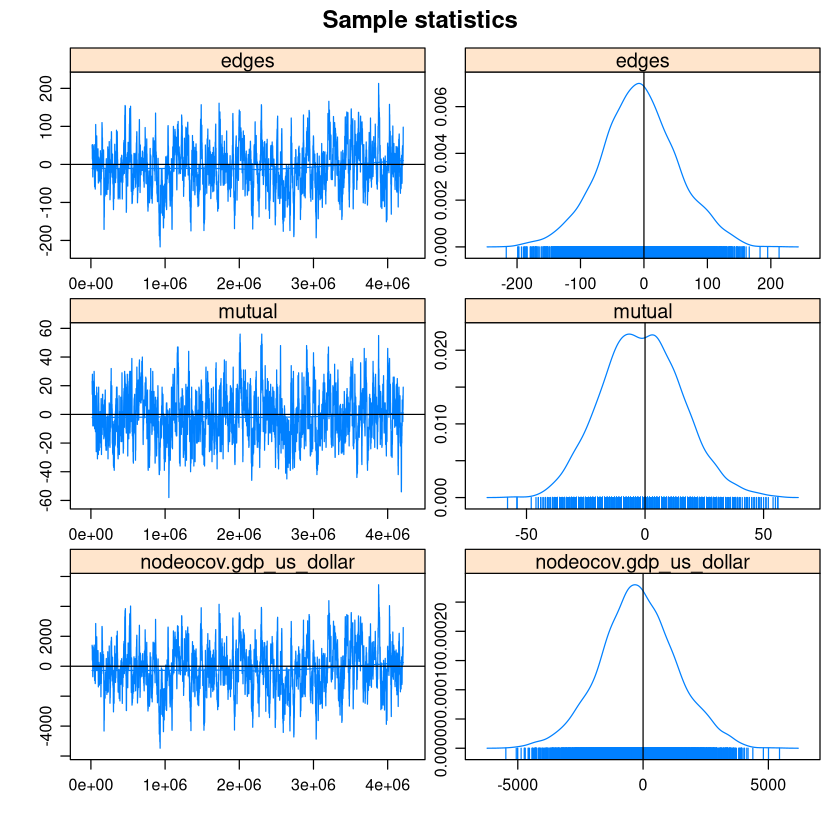

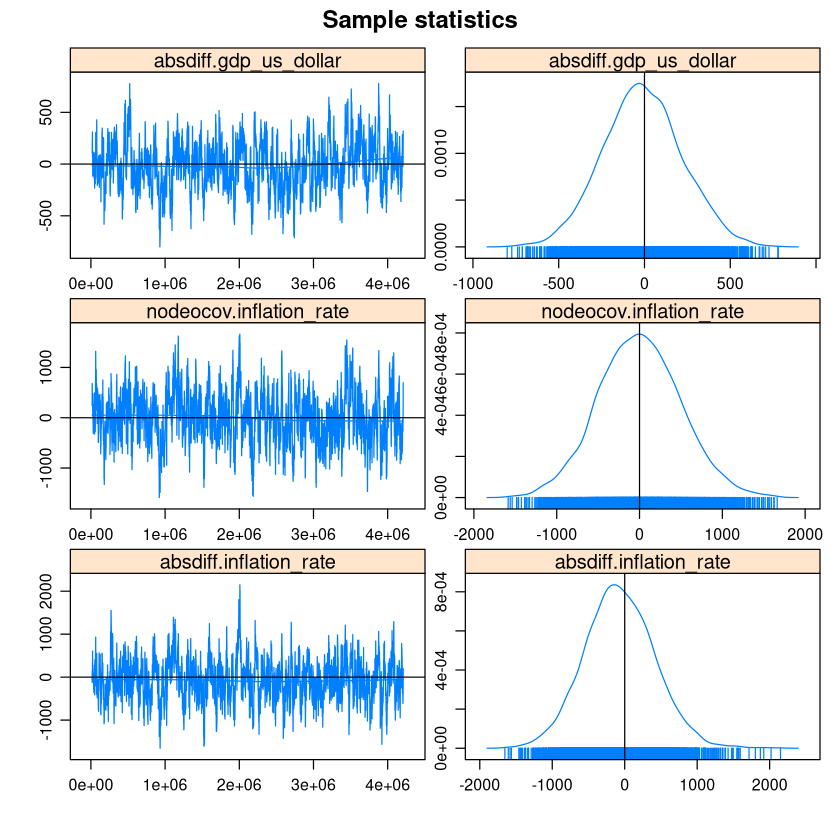


MCMC diagnostics shown here are from the last round of simulation, prior to computation of final parameter estimates. Because the final estimates are refinements of those used for this simulation run, these diagnostics may understate model performance. To directly assess the performance of the final model on in-model statistics, please use the GOF command: gof(ergmFitObject, GOF=~model).


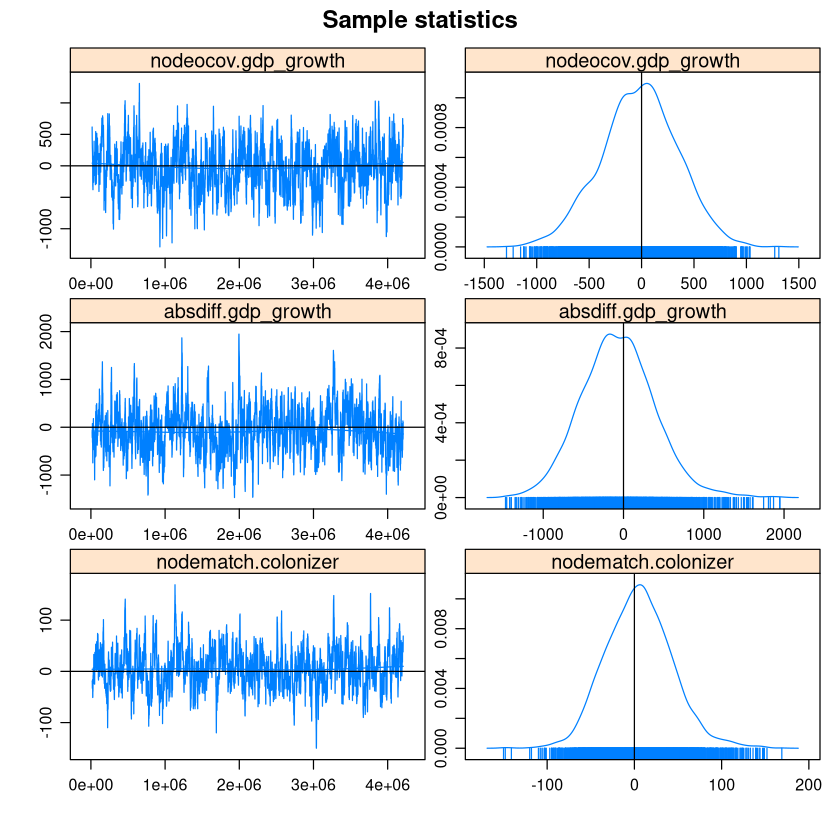

In [13]:
mcmc.diagnostics(model)